In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import api_key
from datetime import datetime
from pandas import Timestamp
import requests
import scipy.stats as stats

In [54]:
bigfoot_weather_df = pd.read_csv("Bigfoot Weather Data.csv")
bigfoot_weather_df.head()

,Unnamed: 0,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,precip_intensity,visibility,conditions,wind_speed,Precip Intensity Groups,Visibility Classification (mi),Cloud Cover Classification (%)
0,1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,0.204,9.3,"Snow, Rain, Partially cloudy",17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5
1,2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,3.208,5.0,"Rain, Overcast",7.6,violent: >2,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100
2,3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,0.000,13.0,Partially cloudy,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5
3,7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,0.000,2.6,Overcast,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100
4,10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,0.000,20.4,Clear,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Sunny: 6.25 to 25


In [55]:
dates = pd.DataFrame(bigfoot_weather_df['date'] + " 12:00:00")
dates_unix = pd.to_datetime(bigfoot_weather_df["date"])
unix = dates_unix.view("int64")
unix
bigfoot_weather_df["unix"] = unix
bigfoot_weather_df

,Unnamed: 0,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,precip_intensity,visibility,conditions,wind_speed,Precip Intensity Groups,Visibility Classification (mi),Cloud Cover Classification (%),unix
0,1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,0.204,9.3,"Snow, Rain, Partially cloudy",17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5,1133568000000000000
1,2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,3.208,5.0,"Rain, Overcast",7.6,violent: >2,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,1128729600000000000
2,3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,0.000,13.0,Partially cloudy,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,450230400000000000
3,7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,0.000,2.6,Overcast,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,148867200000000000
4,10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,0.000,20.4,Clear,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Sunny: 6.25 to 25,118022400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,5069,Baker County,Florida,2006-04-12,30.43412,-82.28943,Spring,75.7,58.0,53.0,0.000,8.5,Partially cloudy,15.8,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,1144800000000000000
2839,5070,Alachua County,Florida,1963-09-15,29.67757,-82.35501,Unknown,80.0,64.9,85.2,0.078,13.6,"Rain, Partially cloudy",9.2,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,-198720000000000000
2840,5071,Alachua County,Florida,1985-09-29,29.77535,-82.36570,Fall,84.0,66.8,37.9,0.000,6.1,Partially cloudy,16.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Partly Cloudy/Sunny: 25 to 62.5,496800000000000000
2841,5072,Alachua County,Florida,2000-06-13,29.58358,-82.33316,Summer,93.5,69.2,33.5,0.000,8.5,Partially cloudy,11.5,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,960854400000000000


In [56]:
temp_avgs = (bigfoot_weather_df['temperature_high'] + bigfoot_weather_df['temperature_low']) / 2
temp_avg = temp_avgs.mean()
bigfoot_weather_df["Temperature Average"] = temp_avgs
bigfoot_weather_df["Expected Temperature"] = temp_avg


In [57]:
precip_avgs = (bigfoot_weather_df['precip_intensity']).mean()
bigfoot_weather_df["Expected Precipitation"] = precip_avgs


In [58]:
cloudcover_avgs = (bigfoot_weather_df['cloud_cover']).mean()
bigfoot_weather_df["Expected Cloud Cover"] = cloudcover_avgs


In [59]:
visibility_avgs = (bigfoot_weather_df['visibility']).mean()
bigfoot_weather_df["Expected Visibility"] = visibility_avgs

bigfoot_weather_df.head(25)

,Unnamed: 0,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,...,wind_speed,Precip Intensity Groups,Visibility Classification (mi),Cloud Cover Classification (%),unix,Temperature Average,Expected Temperature,Expected Precipitation,Expected Cloud Cover,Expected Visibility
0,1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,...,17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5,1133568000000000000,29.70,59.071456,0.093595,45.721702,9.977664
1,2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,...,7.6,violent: >2,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,1128729600000000000,55.10,59.071456,0.093595,45.721702,9.977664
2,3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,...,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,450230400000000000,48.00,59.071456,0.093595,45.721702,9.977664
3,7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,...,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,148867200000000000,72.05,59.071456,0.093595,45.721702,9.977664
4,10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,...,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Sunny: 6.25 to 25,118022400000000000,60.10,59.071456,0.093595,45.721702,9.977664
5,12,Westchester County,New York,2010-09-01,41.29873,-73.73717,Fall,90.6,67.3,9.0,...,6.3,light: 0 to 0.1,Clear: 6.21 to 12.43,Mostly Sunny: 6.25 to 25,1283299200000000000,78.95,59.071456,0.093595,45.721702,9.977664
6,14,Washington County,Ohio,1978-11-01,39.54739,-81.39101,Winter,61.4,41.4,27.5,...,8.5,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Partly Cloudy/Sunny: 25 to 62.5,278726400000000000,51.40,59.071456,0.093595,45.721702,9.977664
7,15,Washington County,Ohio,1984-07-04,39.46019,-81.54855,Summer,79.9,70.1,91.6,...,13.9,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,457747200000000000,75.00,59.071456,0.093595,45.721702,9.977664
8,16,Washington County,Ohio,1990-07-01,39.37310,-81.65929,Summer,83.8,65.7,67.4,...,15.8,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Mostly Cloudy: 62.5 to 87.5,646790400000000000,74.75,59.071456,0.093595,45.721702,9.977664
9,17,Washington County,Ohio,2009-10-31,39.42635,-81.37085,Fall,69.0,48.8,81.6,...,18.3,heavy: 0.3 to 2,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5,1256947200000000000,58.90,59.071456,0.093595,45.721702,9.977664


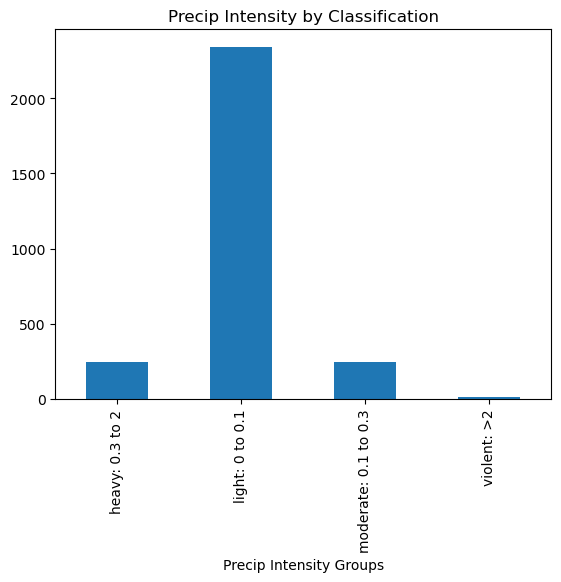

In [60]:
precip_groups = bigfoot_weather_df.groupby('Precip Intensity Groups')
precip_counts = precip_groups['Precip Intensity Groups'].count()

precip_chart = precip_counts.plot(kind="bar", title="Precip Intensity by Classification")

plt.show()

In [61]:
# The degree of freedom is 4-1 = 3
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

#Display the critical value
critical_value

7.814727903251179

In [62]:
stats.chisquare(bigfoot_weather_df['precip_intensity'], bigfoot_weather_df['Expected Precipitation'])


Power_divergenceResult(statistic=2569.9207864932946, pvalue=0.9999011697690071)

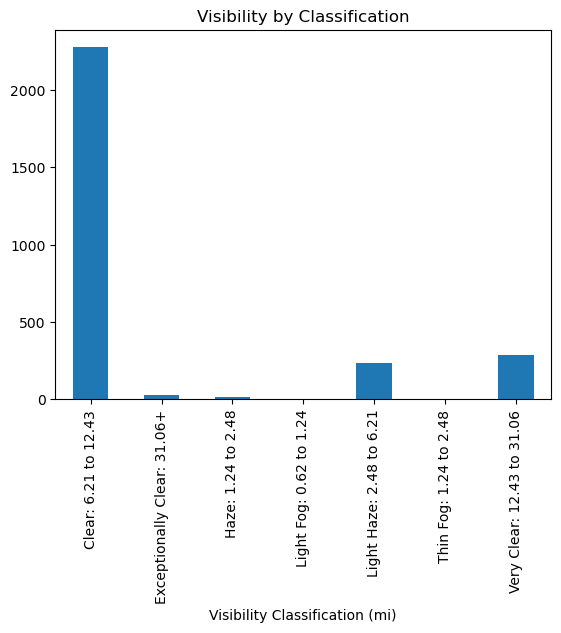

In [63]:
visibility_groups = bigfoot_weather_df.groupby('Visibility Classification (mi)')
visibility_counts = visibility_groups['Visibility Classification (mi)'].count()

visibility_chart = visibility_counts.plot(kind="bar", title="Visibility by Classification")

plt.show()

In [64]:
# The degree of freedom is 7-1 = 6
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 6)

#Display the critical value
critical_value

12.591587243743977

In [65]:
stats.chisquare(bigfoot_weather_df['visibility'], bigfoot_weather_df['Expected Visibility'])


Power_divergenceResult(statistic=6520.128241411463, pvalue=4.730756700723386e-289)

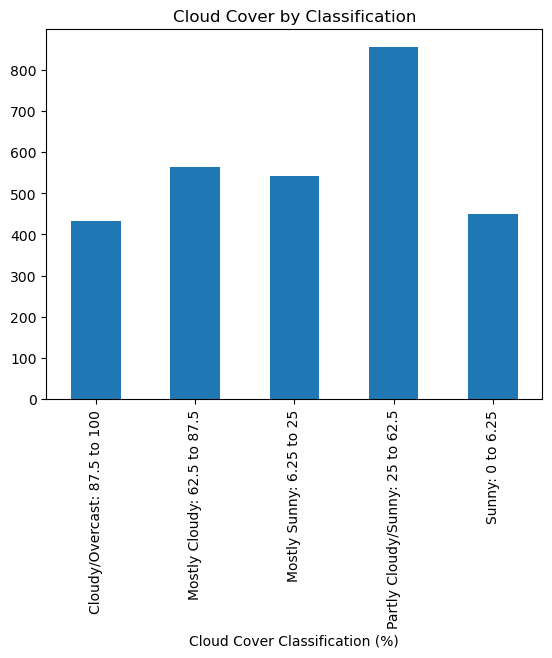

In [66]:
cloudcover_groups = bigfoot_weather_df.groupby('Cloud Cover Classification (%)')
cloudcover_counts = cloudcover_groups['Cloud Cover Classification (%)'].count()

cloudcover_chart = cloudcover_counts.plot(kind="bar", title="Cloud Cover by Classification")

plt.show()

In [67]:
# The degree of freedom is 5-1 = 4
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 4)

#Display the critical value
critical_value

9.487729036781154

In [68]:
stats.chisquare(bigfoot_weather_df['cloud_cover'], bigfoot_weather_df['Expected Cloud Cover'])


Power_divergenceResult(statistic=67535.27683903284, pvalue=0.0)

In [69]:
bigfoot_reduced = pd.DataFrame(bigfoot_weather_df[["state", "latitude","season",
                                                  "Temperature Average",
                                                  "cloud_cover", "Cloud Cover Classification (%)",
                                                   "visibility", "Visibility Classification (mi)",
                                                   "precip_intensity", "Precip Intensity Groups"
                                                  ]])
bigfoot_summer = bigfoot_reduced.loc[(bigfoot_reduced["state"] == "Washington") &
                                    (bigfoot_reduced["season"] == "Summer"), :]
bigfoot_summer

,state,latitude,season,Temperature Average,cloud_cover,Cloud Cover Classification (%),visibility,Visibility Classification (mi),precip_intensity,Precip Intensity Groups
22,Washington,46.71444,Summer,68.00,0.0,Sunny: 0 to 6.25,9.9,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1
24,Washington,46.87139,Summer,52.75,46.3,Partly Cloudy/Sunny: 25 to 62.5,6.6,Clear: 6.21 to 12.43,0.123,moderate: 0.1 to 0.3
25,Washington,46.87330,Summer,71.05,0.0,Sunny: 0 to 6.25,8.9,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1
26,Washington,46.82167,Summer,64.50,17.5,Mostly Sunny: 6.25 to 25,9.5,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1
29,Washington,46.49840,Summer,74.80,0.1,Sunny: 0 to 6.25,10.0,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1
...,...,...,...,...,...,...,...,...,...,...
1211,Washington,46.92694,Summer,51.05,52.9,Partly Cloudy/Sunny: 25 to 62.5,9.5,Clear: 6.21 to 12.43,0.453,heavy: 0.3 to 2
1212,Washington,46.98621,Summer,36.05,75.8,Mostly Cloudy: 62.5 to 87.5,8.7,Clear: 6.21 to 12.43,0.216,moderate: 0.1 to 0.3
1214,Washington,47.23310,Summer,59.15,98.6,Cloudy/Overcast: 87.5 to 100,6.7,Clear: 6.21 to 12.43,0.171,moderate: 0.1 to 0.3
1215,Washington,47.50319,Summer,64.10,45.9,Partly Cloudy/Sunny: 25 to 62.5,9.2,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1


In [70]:
# Using Average temp in Seattle from NOAA of 60.5F during June

bigfoot_summer["Expected Temperature"] = 60.5

# Finding "expected visibility"
bigfoot_summer["Expected Visibility"] = bigfoot_summer["visibility"].mean()

bigfoot_summer["Expected Cloud Cover"] = bigfoot_summer["cloud_cover"].mean()

bigfoot_summer["Expected Precipitation Intensity"] = bigfoot_summer["precip_intensity"].mean()

bigfoot_summer

/Users/matthewtao/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/matthewtao/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/matthewtao/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is 

,state,latitude,season,Temperature Average,cloud_cover,Cloud Cover Classification (%),visibility,Visibility Classification (mi),precip_intensity,Precip Intensity Groups,Expected Temperature,Expected Visibility,Expected Cloud Cover,Expected Precipitation Intensity
22,Washington,46.71444,Summer,68.00,0.0,Sunny: 0 to 6.25,9.9,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1,60.5,12.216463,44.860976,0.05247
24,Washington,46.87139,Summer,52.75,46.3,Partly Cloudy/Sunny: 25 to 62.5,6.6,Clear: 6.21 to 12.43,0.123,moderate: 0.1 to 0.3,60.5,12.216463,44.860976,0.05247
25,Washington,46.87330,Summer,71.05,0.0,Sunny: 0 to 6.25,8.9,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1,60.5,12.216463,44.860976,0.05247
26,Washington,46.82167,Summer,64.50,17.5,Mostly Sunny: 6.25 to 25,9.5,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1,60.5,12.216463,44.860976,0.05247
29,Washington,46.49840,Summer,74.80,0.1,Sunny: 0 to 6.25,10.0,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1,60.5,12.216463,44.860976,0.05247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,Washington,46.92694,Summer,51.05,52.9,Partly Cloudy/Sunny: 25 to 62.5,9.5,Clear: 6.21 to 12.43,0.453,heavy: 0.3 to 2,60.5,12.216463,44.860976,0.05247
1212,Washington,46.98621,Summer,36.05,75.8,Mostly Cloudy: 62.5 to 87.5,8.7,Clear: 6.21 to 12.43,0.216,moderate: 0.1 to 0.3,60.5,12.216463,44.860976,0.05247
1214,Washington,47.23310,Summer,59.15,98.6,Cloudy/Overcast: 87.5 to 100,6.7,Clear: 6.21 to 12.43,0.171,moderate: 0.1 to 0.3,60.5,12.216463,44.860976,0.05247
1215,Washington,47.50319,Summer,64.10,45.9,Partly Cloudy/Sunny: 25 to 62.5,9.2,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1,60.5,12.216463,44.860976,0.05247


In [48]:
min(bigfoot_summer["Temperature Average"]), max(bigfoot_summer["Temperature Average"])

(27.35, 81.05)

In [71]:
# Bins for temperature
bins = [0, 32, 50, 62.5, 75, 87.5]

# Create labels for these bins
group_labels = ["Freezing: 0 to 32F", "Cold: 32F to 50F", "Mild: 50F to 62.5", "Warm: 62.5F to 75F", "Hot: 75F to 100F"
               ]


# Place the data series into a new column inside of the DataFrame
bigfoot_summer["Temperature Classifications"] = pd.cut(bigfoot_summer["Temperature Average"], bins, labels=group_labels)

bigfoot_summer

/Users/matthewtao/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,state,latitude,season,Temperature Average,cloud_cover,Cloud Cover Classification (%),visibility,Visibility Classification (mi),precip_intensity,Precip Intensity Groups,Expected Temperature,Expected Visibility,Expected Cloud Cover,Expected Precipitation Intensity,Temperature Classifications
22,Washington,46.71444,Summer,68.00,0.0,Sunny: 0 to 6.25,9.9,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1,60.5,12.216463,44.860976,0.05247,Warm: 62.5F to 75F
24,Washington,46.87139,Summer,52.75,46.3,Partly Cloudy/Sunny: 25 to 62.5,6.6,Clear: 6.21 to 12.43,0.123,moderate: 0.1 to 0.3,60.5,12.216463,44.860976,0.05247,Mild: 50F to 62.5
25,Washington,46.87330,Summer,71.05,0.0,Sunny: 0 to 6.25,8.9,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1,60.5,12.216463,44.860976,0.05247,Warm: 62.5F to 75F
26,Washington,46.82167,Summer,64.50,17.5,Mostly Sunny: 6.25 to 25,9.5,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1,60.5,12.216463,44.860976,0.05247,Warm: 62.5F to 75F
29,Washington,46.49840,Summer,74.80,0.1,Sunny: 0 to 6.25,10.0,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1,60.5,12.216463,44.860976,0.05247,Warm: 62.5F to 75F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,Washington,46.92694,Summer,51.05,52.9,Partly Cloudy/Sunny: 25 to 62.5,9.5,Clear: 6.21 to 12.43,0.453,heavy: 0.3 to 2,60.5,12.216463,44.860976,0.05247,Mild: 50F to 62.5
1212,Washington,46.98621,Summer,36.05,75.8,Mostly Cloudy: 62.5 to 87.5,8.7,Clear: 6.21 to 12.43,0.216,moderate: 0.1 to 0.3,60.5,12.216463,44.860976,0.05247,Cold: 32F to 50F
1214,Washington,47.23310,Summer,59.15,98.6,Cloudy/Overcast: 87.5 to 100,6.7,Clear: 6.21 to 12.43,0.171,moderate: 0.1 to 0.3,60.5,12.216463,44.860976,0.05247,Mild: 50F to 62.5
1215,Washington,47.50319,Summer,64.10,45.9,Partly Cloudy/Sunny: 25 to 62.5,9.2,Clear: 6.21 to 12.43,0.000,light: 0 to 0.1,60.5,12.216463,44.860976,0.05247,Warm: 62.5F to 75F


In [73]:
bigfoot_washington_summer = bigfoot_summer[["state", "latitude", "season", 
                                           "Temperature Average", "Expected Temperature", "Temperature Classifications",
                                           "cloud_cover", "Expected Cloud Cover", "Cloud Cover Classification (%)",
                                           "visibility", "Expected Visibility", "Visibility Classification (mi)",
                                           "precip_intensity", "Expected Precipitation Intensity", "Precip Intensity Groups"
]]
bigfoot_washington_summer

,state,latitude,season,Temperature Average,Expected Temperature,Temperature Classifications,cloud_cover,Expected Cloud Cover,Cloud Cover Classification (%),visibility,Expected Visibility,Visibility Classification (mi),precip_intensity,Expected Precipitation Intensity,Precip Intensity Groups
22,Washington,46.71444,Summer,68.00,60.5,Warm: 62.5F to 75F,0.0,44.860976,Sunny: 0 to 6.25,9.9,12.216463,Clear: 6.21 to 12.43,0.000,0.05247,light: 0 to 0.1
24,Washington,46.87139,Summer,52.75,60.5,Mild: 50F to 62.5,46.3,44.860976,Partly Cloudy/Sunny: 25 to 62.5,6.6,12.216463,Clear: 6.21 to 12.43,0.123,0.05247,moderate: 0.1 to 0.3
25,Washington,46.87330,Summer,71.05,60.5,Warm: 62.5F to 75F,0.0,44.860976,Sunny: 0 to 6.25,8.9,12.216463,Clear: 6.21 to 12.43,0.000,0.05247,light: 0 to 0.1
26,Washington,46.82167,Summer,64.50,60.5,Warm: 62.5F to 75F,17.5,44.860976,Mostly Sunny: 6.25 to 25,9.5,12.216463,Clear: 6.21 to 12.43,0.000,0.05247,light: 0 to 0.1
29,Washington,46.49840,Summer,74.80,60.5,Warm: 62.5F to 75F,0.1,44.860976,Sunny: 0 to 6.25,10.0,12.216463,Clear: 6.21 to 12.43,0.000,0.05247,light: 0 to 0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,Washington,46.92694,Summer,51.05,60.5,Mild: 50F to 62.5,52.9,44.860976,Partly Cloudy/Sunny: 25 to 62.5,9.5,12.216463,Clear: 6.21 to 12.43,0.453,0.05247,heavy: 0.3 to 2
1212,Washington,46.98621,Summer,36.05,60.5,Cold: 32F to 50F,75.8,44.860976,Mostly Cloudy: 62.5 to 87.5,8.7,12.216463,Clear: 6.21 to 12.43,0.216,0.05247,moderate: 0.1 to 0.3
1214,Washington,47.23310,Summer,59.15,60.5,Mild: 50F to 62.5,98.6,44.860976,Cloudy/Overcast: 87.5 to 100,6.7,12.216463,Clear: 6.21 to 12.43,0.171,0.05247,moderate: 0.1 to 0.3
1215,Washington,47.50319,Summer,64.10,60.5,Warm: 62.5F to 75F,45.9,44.860976,Partly Cloudy/Sunny: 25 to 62.5,9.2,12.216463,Clear: 6.21 to 12.43,0.000,0.05247,light: 0 to 0.1


In [74]:
bigfoot_washington_summer.to_csv("Bigfoot_Washington_Summer_df.csv")

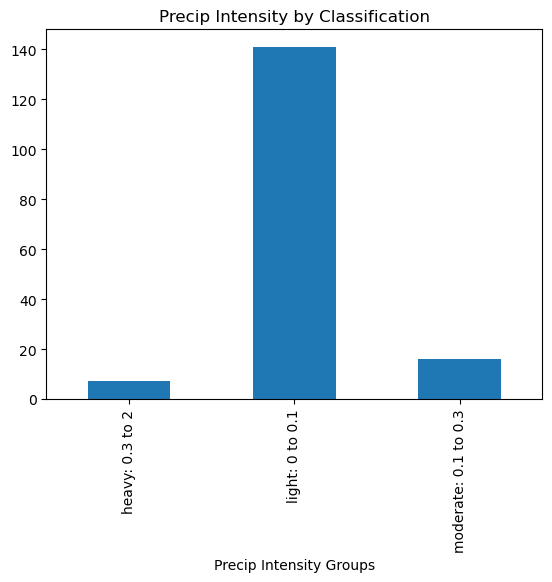

In [75]:
precip_groups = bigfoot_washington_summer.groupby('Precip Intensity Groups')
precip_counts = precip_groups['Precip Intensity Groups'].count()

precip_chart = precip_counts.plot(kind="bar", title="Precip Intensity by Classification")

plt.show()

In [80]:
critical_value = stats.chi2.ppf(q = 0.95, df = 2)

#Display the critical value
critical_value

5.991464547107979

In [78]:
stats.chisquare(bigfoot_washington_summer['precip_intensity'], bigfoot_washington_summer['Expected Precipitation Intensity'])


Power_divergenceResult(statistic=65.0349260894829, pvalue=0.9999999999995913)

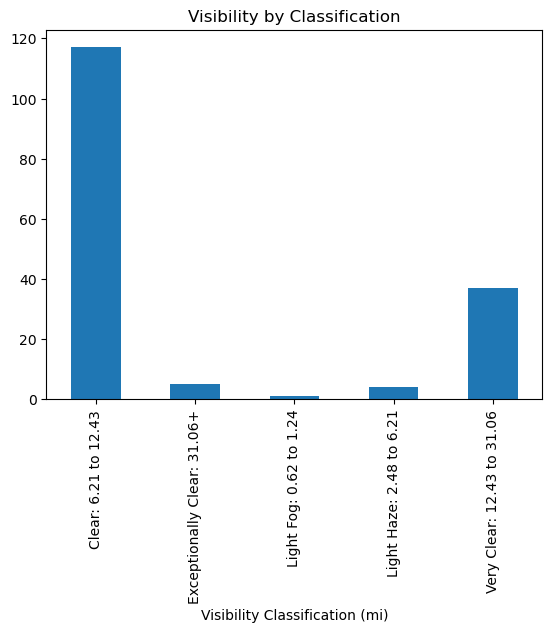

In [79]:
visibility_groups = bigfoot_washington_summer.groupby('Visibility Classification (mi)')
visibility_counts = visibility_groups['Visibility Classification (mi)'].count()

visibility_chart = visibility_counts.plot(kind="bar", title="Visibility by Classification")

plt.show()

In [81]:
critical_value = stats.chi2.ppf(q = 0.95, df = 4)

#Display the critical value
critical_value

9.487729036781154

In [82]:
stats.chisquare(bigfoot_washington_summer['visibility'], bigfoot_washington_summer['Expected Visibility'])


Power_divergenceResult(statistic=593.3260144746689, pvalue=3.210258229359114e-50)

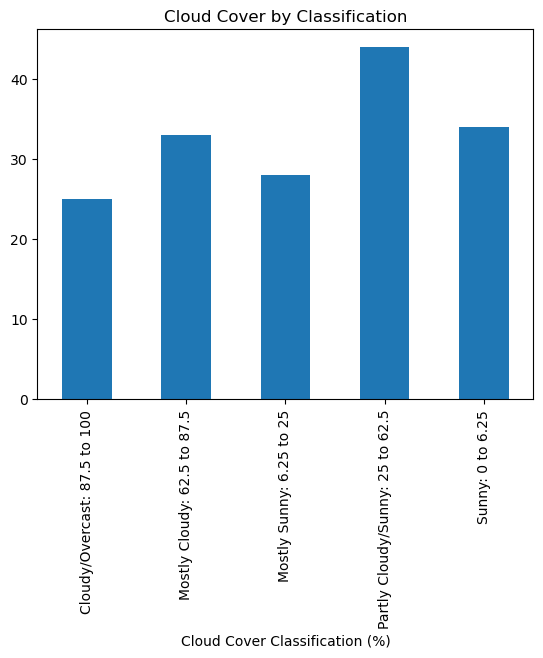

In [83]:
cloudcover_groups = bigfoot_washington_summer.groupby('Cloud Cover Classification (%)')
cloudcover_counts = cloudcover_groups['Cloud Cover Classification (%)'].count()

cloudcover_chart = cloudcover_counts.plot(kind="bar", title="Cloud Cover by Classification")

plt.show()

In [84]:
critical_value = stats.chi2.ppf(q = 0.95, df = 4)

#Display the critical value
critical_value

9.487729036781154

In [85]:
stats.chisquare(bigfoot_washington_summer['cloud_cover'], bigfoot_washington_summer['Expected Cloud Cover'])


Power_divergenceResult(statistic=4158.7978796281195, pvalue=0.0)